In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Salary.csv")
df = df[df['Education Level'].notna()]
df = df[df['Salary'].notna()]

In [3]:
def assign_department(job_title):
    if pd.isna(job_title):
        return 'Unknown'
    elif any(keyword in job_title.lower() for keyword in ['software', 'developer', 'engineer', 'it', 'data', 'technology', 'ux', 'web']):
        return 'Technology'
    elif any(keyword in job_title.lower() for keyword in ['sales', 'customer', 'account', 'marketing', 'public relations', 'social media']):
        return 'Sales & Marketing'
    elif any(keyword in job_title.lower() for keyword in ['hr', 'human resources', 'recruiter', 'training']):
        return 'Human Resources'
    elif any(keyword in job_title.lower() for keyword in ['finance', 'accountant', 'financial', 'vp of finance', 'business']):
        return 'Finance'
    elif any(keyword in job_title.lower() for keyword in ['operations', 'supply chain', 'logistics']):
        return 'Operations'
    elif any(keyword in job_title.lower() for keyword in ['admin', 'assistant', 'office', 'receptionist', 'data entry']):
        return 'Administration'
    elif any(keyword in job_title.lower() for keyword in ['product', 'project', 'business analyst']):
        return 'Product & Project Management'
    elif any(keyword in job_title.lower() for keyword in ['research', 'scientist', 'director', 'strategy', 'creative']):
        return 'Research & Strategy'
    elif any(keyword in job_title.lower() for keyword in ['manager']):
        return 'Management'
    else:
        return 'Other'

df['Department'] = df['Job Title'].apply(assign_department)

In [4]:
def assign_education_level(education_level):
    if any(keyword in education_level.lower() for keyword in ["bachelor's"]):
        return "Bachelor's Degree"
    elif any(keyword in education_level.lower() for keyword in ["master's"]):
        return "Master's Degree"
    elif any(keyword in education_level.lower() for keyword in ["phd"]):
        return "PhD"
    elif any(keyword in education_level.lower() for keyword in ["high school"]):
        return "High School"

df['Education Level Updated'] = df['Education Level'].apply(assign_education_level)

In [5]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Race', 'Department', 'Education Level Updated'],
      dtype='object')

In [6]:
categorical_cols = ['Education Level Updated', 'Department']
df = pd.get_dummies(df, columns=categorical_cols, dtype=int)

In [7]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Race', 'Education Level Updated_Bachelor's Degree',
       'Education Level Updated_High School',
       'Education Level Updated_Master's Degree',
       'Education Level Updated_PhD', 'Department_Administration',
       'Department_Finance', 'Department_Human Resources',
       'Department_Management', 'Department_Operations', 'Department_Other',
       'Department_Product & Project Management',
       'Department_Research & Strategy', 'Department_Sales & Marketing',
       'Department_Technology'],
      dtype='object')

In [8]:
df = df.drop(['Race', 'Education Level', 'Job Title', 'Gender'], axis=1)
df.columns

Index(['Age', 'Years of Experience', 'Salary',
       'Education Level Updated_Bachelor's Degree',
       'Education Level Updated_High School',
       'Education Level Updated_Master's Degree',
       'Education Level Updated_PhD', 'Department_Administration',
       'Department_Finance', 'Department_Human Resources',
       'Department_Management', 'Department_Operations', 'Department_Other',
       'Department_Product & Project Management',
       'Department_Research & Strategy', 'Department_Sales & Marketing',
       'Department_Technology'],
      dtype='object')

In [9]:
features = df.loc[:, df.columns != 'Salary'].columns

In [10]:
X = df[features]
y = df['Salary']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

## Results from hyperparatmer grid search

The best parameters returned from the gridsearch added little benefits to the model's accruacy beyond the model above.

In [13]:
# param_grid = {
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# grid_search.fit(X_train, y_train)

# print("Best parameters:", grid_search.best_params_)

# grid_search_output = grid_search.best_params_

In [14]:
# rf_model = RandomForestRegressor(**grid_search_output, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
y_pred = rf_model.predict(X_test)

In [16]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [17]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 7292.927568432989
Mean Squared Error: 183921309.23892295
Root Mean Squared Error: 13561.759076127364
R2 Score: 0.9354992327763214


In [18]:
import joblib
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

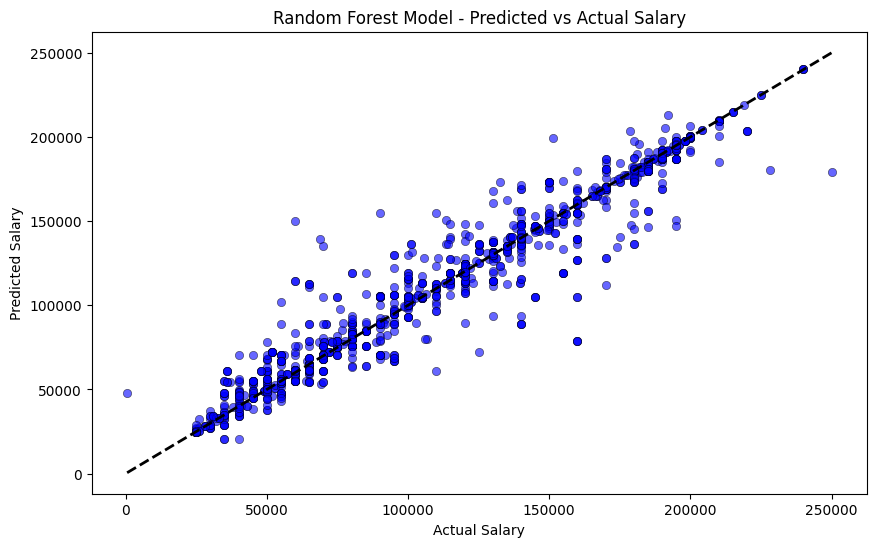

In [33]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='b', edgecolor="k")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Random Forest Model - Predicted vs Actual Salary")

plt.show()
